In [73]:
#imports
import pandas as pd
import matplotlib.pyplot as plt 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

#Compare the reliability of neighborhood reports. Which neighborhoods are providing reliable reports? Provide a rationale for your response.

In [74]:
reports_df = pd.read_csv('hw05-data/Damage Reports/mc1-reports-data.csv')
reports_df['timeStamp'] = pd.to_datetime(reports_df['time'], errors='coerce')
reports_df = reports_df.drop(columns=['time'])
reports_df = reports_df.dropna()
reports_df['avg_infrastructure_damage'] = reports_df[['sewer_and_water', 'power', 'roads_and_bridges','buildings']].mean(axis=1)
reports_df['rounded_timeStamp'] = reports_df['timeStamp'].dt.round('30min')
reports_df.head()

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location,timeStamp,avg_infrastructure_damage,rounded_timeStamp
1,2.0,10.0,0.0,8.0,4.0,0.0,1,2020-04-09 13:50:00,4.00,2020-04-09 14:00:00
2,7.0,10.0,10.0,9.0,10.0,0.0,1,2020-04-09 00:20:00,9.25,2020-04-09 00:30:00
8,10.0,7.0,7.0,1.0,3.0,0.0,1,2020-04-10 19:40:00,6.75,2020-04-10 19:30:00
10,4.0,0.0,6.0,7.0,5.0,0.0,1,2020-04-09 23:00:00,3.75,2020-04-09 23:00:00
13,1.0,7.0,5.0,10.0,5.0,1.0,1,2020-04-10 15:05:00,4.50,2020-04-10 15:00:00


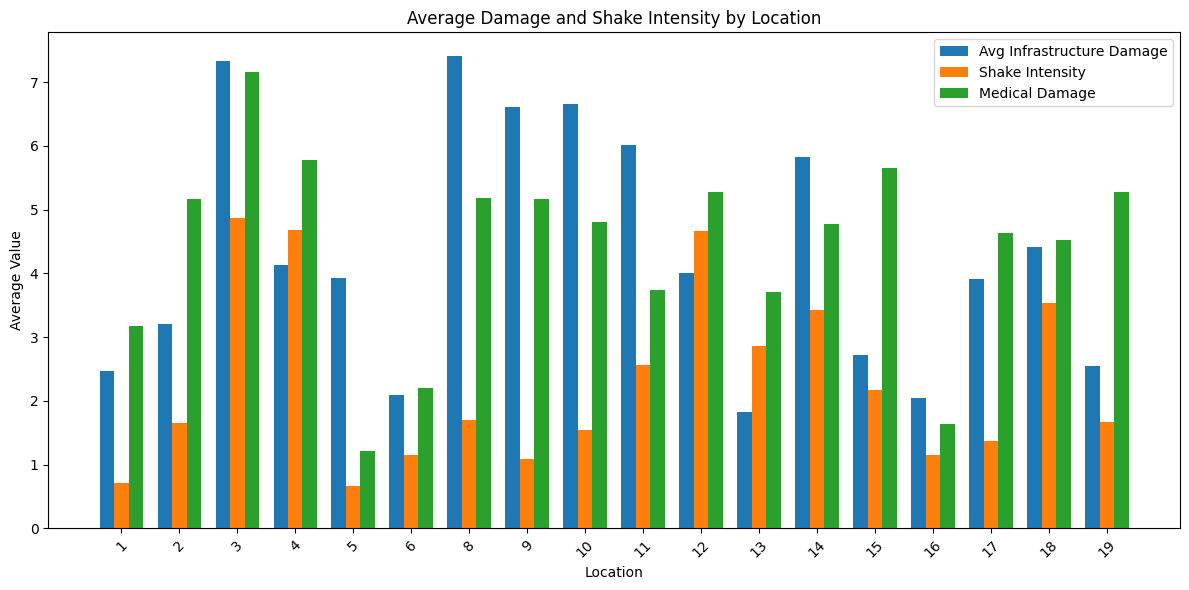

In [75]:
#data frame of average damage and shake intensity by location 
location_avg_df = reports_df.groupby('location')[['avg_infrastructure_damage', 'shake_intensity', "medical"]].mean().reset_index()
location_avg_df.head()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width and location indices
bar_width = 0.25
locations = location_avg_df['location']
index = np.arange(len(locations))

# Plot each metric as separate bars
ax.bar(index, location_avg_df['avg_infrastructure_damage'], bar_width, label='Avg Infrastructure Damage')
ax.bar(index + bar_width, location_avg_df['shake_intensity'], bar_width, label='Shake Intensity')
ax.bar(index + 2 * bar_width, location_avg_df['medical'], bar_width, label='Medical Damage')

# Labeling
ax.set_xlabel('Location')
ax.set_ylabel('Average Value')
ax.set_title('Average Damage and Shake Intensity by Location')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(locations)
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
#data frame of average damage and shake intensity by location 
location_avg_df = reports_df.groupby('location')[["medical"]].mean().reset_index()
location_avg_df=location_avg_df.assign(hospital=['y', 'n', 'y', 'n', 'y', 'y', 'n', 'y', 'n', 'y', 'n', 'n', 'n', 'n', 'y', 'n', 'n', 'n'])
location_avg_df = location_avg_df.assign(name=["Palace Hills", "Northwest", "Old Town",
"Safe Town", "Southwest", "Downtown", "Scenic Vista", "Broadview", "Chapparal","Terrapin", "Peppermill", "Chedarford", "Easton", "Weston", "Southton", "Oak Willow", "East Parton", "West Parton"])
location_avg_df

,location,medical,hospital,name
0,1,3.173351,y,Palace Hills
1,2,5.168831,n,Northwest
2,3,7.157618,y,Old Town
3,4,5.780488,n,Safe Town
4,5,1.207335,y,Southwest
5,6,2.203527,y,Downtown
6,8,5.174107,n,Scenic Vista
7,9,5.169569,y,Broadview
8,10,4.800000,n,Chapparal
9,11,3.736326,y,Terrapin


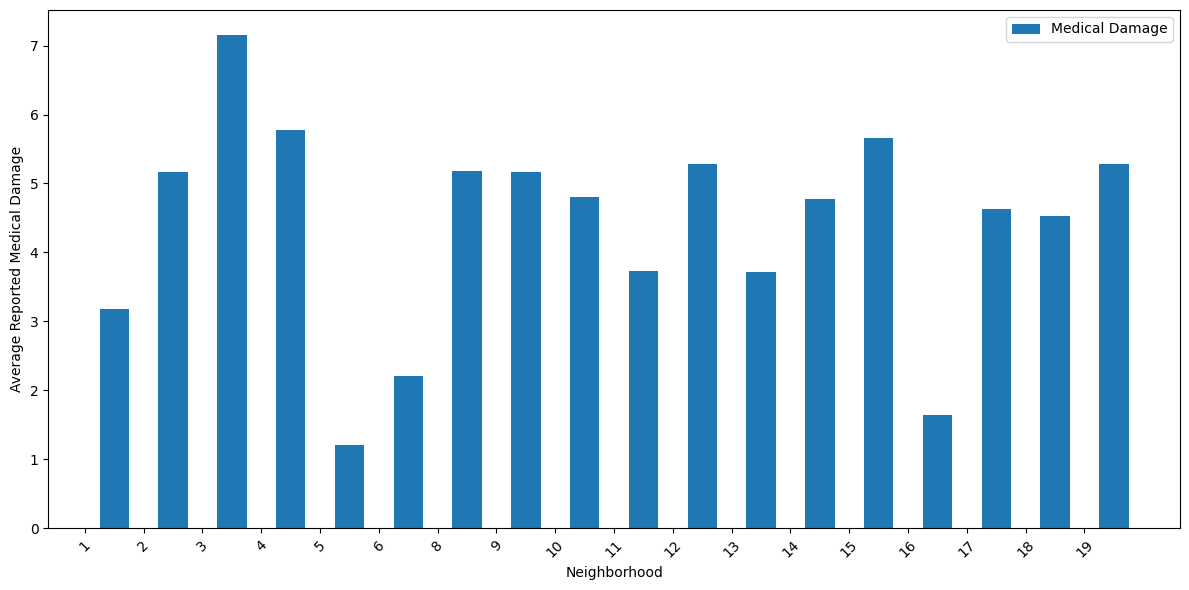

In [106]:
#Prioritizing medical emergency 
#data frame of average damage and shake intensity by location 
location_avg_df = reports_df.groupby('location')[["medical"]].mean().reset_index()
location_avg_df.head()

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width and location indices
bar_width = 0.5
locations = location_avg_df['location']
index = np.arange(len(locations))


ax.bar(index + 2 * bar_width, location_avg_df['medical'], bar_width, label='Medical Damage')

# Labeling
ax.set_xlabel('Neighborhood')
ax.set_ylabel('Average Reported Medical Damage')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(locations)
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
#time of shake intensity
mask_1 = (reports_df['location'] == 1)
mask_1_df = reports_df.loc[mask_1]
shake_intensity_avg_1_df = mask_1_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_1_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_2 = (reports_df['location'] == 2)
mask_2_df = reports_df.loc[mask_2]
shake_intensity_avg_2_df = mask_2_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_2_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_3 = (reports_df['location'] == 3)
mask_3_df = reports_df.loc[mask_3]
shake_intensity_avg_3_df = mask_3_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_3_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_4 = (reports_df['location'] == 4)
mask_4_df = reports_df.loc[mask_4]
shake_intensity_avg_4_df = mask_4_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_4_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_5 = (reports_df['location'] == 5)
mask_5_df = reports_df.loc[mask_5]
shake_intensity_avg_5_df = mask_5_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_5_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_6 = (reports_df['location'] == 6)
mask_6_df = reports_df.loc[mask_6]
shake_intensity_avg_6_df = mask_6_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_6_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_7 = (reports_df['location'] == 7)
mask_7_df = reports_df.loc[mask_7]
shake_intensity_avg_7_df = mask_7_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_7_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_8 = (reports_df['location'] == 8)
mask_8_df = reports_df.loc[mask_8]
shake_intensity_avg_8_df = mask_8_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_8_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_9 = (reports_df['location'] == 9)
mask_9_df = reports_df.loc[mask_9]
shake_intensity_avg_9_df = mask_9_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_9_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_10 = (reports_df['location'] == 10)
mask_10_df = reports_df.loc[mask_10]
shake_intensity_avg_10_df = mask_10_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_10_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_11 = (reports_df['location'] == 11)
mask_11_df = reports_df.loc[mask_11]
shake_intensity_avg_11_df = mask_11_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_11_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_12 = (reports_df['location'] == 12)
mask_12_df = reports_df.loc[mask_12]
shake_intensity_avg_12_df = mask_12_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_12_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_13 = (reports_df['location'] == 13)
mask_13_df = reports_df.loc[mask_13]
shake_intensity_avg_13_df = mask_13_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_13_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_14 = (reports_df['location'] == 14)
mask_14_df = reports_df.loc[mask_14]
shake_intensity_avg_14_df = mask_14_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_14_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_15 = (reports_df['location'] == 15)
mask_15_df = reports_df.loc[mask_15]
shake_intensity_avg_15_df = mask_15_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_15_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_16 = (reports_df['location'] == 16)
mask_16_df = reports_df.loc[mask_16]
shake_intensity_avg_16_df = mask_16_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_16_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_17 = (reports_df['location'] == 17)
mask_17_df = reports_df.loc[mask_17]
shake_intensity_avg_17_df = mask_17_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_17_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_18 = (reports_df['location'] == 18)
mask_18_df = reports_df.loc[mask_18]
shake_intensity_avg_18_df = mask_18_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_18_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

mask_19 = (reports_df['location'] == 19)
mask_19_df = reports_df.loc[mask_19]
shake_intensity_avg_19_df = mask_19_df.groupby('rounded_timeStamp')['shake_intensity'].mean().reset_index()
shake_intensity_avg_19_df.columns = ['rounded_timeStamp', 'avg_shake_intensity']

In [77]:
fig = make_subplots(rows=19, cols=1, subplot_titles=["Palace Hills", "Northwest", "Old Town",
"Safe Town", "Southwest", "Downtown", "Wilson Forest", "Scenic Vista", "Broadview", "Chapparal", "Peppermill", "Chedarford", "Easton", "Weston", "Southton", "Oak Willow", "East Parton", "West Parton"])

# EC plot (First row)
fig.add_trace(
    go.Scatter(x=shake_intensity_avg_1_df['rounded_timeStamp'], 
               y=shake_intensity_avg_1_df['avg_shake_intensity'], 
               mode='lines', name='Palace Hills',
               fill='tozeroy',),
    row=1, col=1
)

# TL plot (Second row)
fig.add_trace(
    go.Scatter(x=shake_intensity_avg_2_df['rounded_timeStamp'], 
               y=shake_intensity_avg_2_df['avg_shake_intensity'], 
               mode='lines', name='Northwest',
               fill ='tozeroy',),
    row=2, col=1
)

# KL plot (Third row)
fig.add_trace(
    go.Scatter(x=shake_intensity_avg_3_df['rounded_timeStamp'], 
               y=shake_intensity_avg_3_df['avg_shake_intensity'], 
               mode='lines', name='Old Town', 
               fill='tozeroy',),
    row=3, col=1
)

# WL plot (Fourth row)
fig.add_trace(
    go.Scatter(x=shake_intensity_avg_4_df['rounded_timeStamp'], 
               y=shake_intensity_avg_4_df['avg_shake_intensity'], 
               mode='lines', name='safe Town', 
               fill='tozeroy',),
    row=4, col=1
)

# CA plot (Fifth row)
fig.add_trace(
    go.Scatter(x=shake_intensity_avg_5_df['rounded_timeStamp'], 
               y=shake_intensity_avg_5_df['avg_shake_intensity'], 
               mode='lines', name='south West', 
               fill='tozeroy',),
    row=5, col=1
)

# CA plot (Fifth row)
fig.add_trace(
    go.Scatter(x=shake_intensity_avg_6_df['rounded_timeStamp'], 
               y=shake_intensity_avg_6_df['avg_shake_intensity'], 
               mode='lines', name='Downtown', 
               fill='tozeroy',),
    row=6, col=1
)

# CA plot (Rows 7 to 19)
fig.add_trace(
    go.Scatter(x=shake_intensity_avg_7_df['rounded_timeStamp'], 
               y=shake_intensity_avg_7_df['avg_shake_intensity'], 
               mode='lines', name='Location 7', 
               fill='tozeroy'),
    row=7, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_8_df['rounded_timeStamp'], 
               y=shake_intensity_avg_8_df['avg_shake_intensity'], 
               mode='lines', name='Location 8', 
               fill='tozeroy'),
    row=8, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_9_df['rounded_timeStamp'], 
               y=shake_intensity_avg_9_df['avg_shake_intensity'], 
               mode='lines', name='Location 9', 
               fill='tozeroy'),
    row=9, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_10_df['rounded_timeStamp'], 
               y=shake_intensity_avg_10_df['avg_shake_intensity'], 
               mode='lines', name='Location 10', 
               fill='tozeroy'),
    row=10, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_11_df['rounded_timeStamp'], 
               y=shake_intensity_avg_11_df['avg_shake_intensity'], 
               mode='lines', name='Location 11', 
               fill='tozeroy'),
    row=11, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_12_df['rounded_timeStamp'], 
               y=shake_intensity_avg_12_df['avg_shake_intensity'], 
               mode='lines', name='Location 12', 
               fill='tozeroy'),
    row=12, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_13_df['rounded_timeStamp'], 
               y=shake_intensity_avg_13_df['avg_shake_intensity'], 
               mode='lines', name='Location 13', 
               fill='tozeroy'),
    row=13, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_14_df['rounded_timeStamp'], 
               y=shake_intensity_avg_14_df['avg_shake_intensity'], 
               mode='lines', name='Location 14', 
               fill='tozeroy'),
    row=14, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_15_df['rounded_timeStamp'], 
               y=shake_intensity_avg_15_df['avg_shake_intensity'], 
               mode='lines', name='Location 15', 
               fill='tozeroy'),
    row=15, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_16_df['rounded_timeStamp'], 
               y=shake_intensity_avg_16_df['avg_shake_intensity'], 
               mode='lines', name='Location 16', 
               fill='tozeroy'),
    row=16, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_17_df['rounded_timeStamp'], 
               y=shake_intensity_avg_17_df['avg_shake_intensity'], 
               mode='lines', name='Location 17', 
               fill='tozeroy'),
    row=17, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_18_df['rounded_timeStamp'], 
               y=shake_intensity_avg_18_df['avg_shake_intensity'], 
               mode='lines', name='Location 18', 
               fill='tozeroy'),
    row=18, col=1
)

fig.add_trace(
    go.Scatter(x=shake_intensity_avg_19_df['rounded_timeStamp'], 
               y=shake_intensity_avg_19_df['avg_shake_intensity'], 
               mode='lines', name='Location 19', 
               fill='tozeroy'),
    row=19, col=1
)

fig.update_layout(
    height=900, width=800, 
    title_text="Frequency of Calls Per Ten Minutes (Friday to Sunday)", 

    # Set y-axis ranges for each subplot
    yaxis=dict(range=[0, 11], title='Shake Intensity'),
    yaxis2=dict(range=[0, 11], title='Shake Intensity'),
    yaxis3=dict(range=[0, 11], title='Shake Intensity'),
    yaxis4=dict(range=[0, 11], title='Shake Intensity'),
    yaxis5=dict(range=[0, 11], title='Shake Intensity'),
    yaxis6=dict(range=[0, 11], title='Shake Intensity'),
    yaxis7=dict(range=[0, 11], title='Shake Intensity'),
    yaxis8=dict(range=[0, 11], title='Shake Intensity'),
    yaxis9=dict(range=[0, 11], title='Shake Intensity'),
    yaxis10=dict(range=[0, 11], title='Shake Intensity'),
    yaxis11=dict(range=[0, 11], title='Shake Intensity'),
    yaxis12=dict(range=[0, 11], title='Shake Intensity'),
    yaxis13=dict(range=[0, 11], title='Shake Intensity'),
    yaxis14=dict(range=[0, 11], title='Shake Intensity'),
    yaxis15=dict(range=[0, 11], title='Shake Intensity'),
    yaxis16=dict(range=[0, 11], title='Shake Intensity'),
    yaxis17=dict(range=[0, 11], title='Shake Intensity'),
    yaxis18=dict(range=[0, 11], title='Shake Intensity'),
    yaxis19=dict(range=[0, 11], title='Shake Intensity'),


)

# Display the figure
fig.show()